# How to Load Natural Stimulus Data

In [29]:
import numpy as np
import os
import h5py
import pyret
import binary     # in igor >> recording
from load_natural_stimulus import *

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [30]:
data_dir = os.path.expanduser('~/Documents/Stanford/00 Baccus Lab/Data 2015_07_02/')
stim_file = data_dir + 'natural_scenes_stimulus_compressed.h5'
f = h5py.File(stim_file)

In [31]:
f.keys()

[u'images', u'spikes', u'stimulus']

In [32]:
natural_stimuli = NaturalScenesStimulus(f['images'], f['stimulus'])

In [33]:
natural_stimuli[0].shape

> /Users/lmcintosh/Git/natural-scenes/load_natural_stimulus.py(54)__getitem__()
-> try:
(Pdb) img_index
14
(Pdb) xstart
507
(Pdb) ystart
963
(Pdb) n
> /Users/lmcintosh/Git/natural-scenes/load_natural_stimulus.py(56)__getitem__()
-> imgs = [rescale(self.images[img_idx]) for img_idx in img_index]
(Pdb) self.images[img_idx]
*** NameError: name 'img_idx' is not defined
(Pdb) n
TypeError: "'numpy.int64' object is not iterable"
> /Users/lmcintosh/Git/natural-scenes/load_natural_stimulus.py(56)__getitem__()
-> imgs = [rescale(self.images[img_idx]) for img_idx in img_index]
(Pdb) n
> /Users/lmcintosh/Git/natural-scenes/load_natural_stimulus.py(58)__getitem__()
-> except:
(Pdb) self.images[img_index]
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)
(Pdb) 

BdbQuit: 

In [25]:
f['stimulus'][0]

array([ 14, 507, 963], dtype=int32)

In [26]:
natural_stimuli[0]

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)

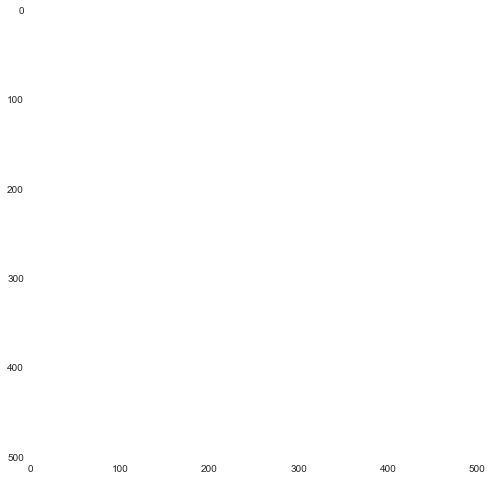

In [24]:
plt.imshow(natural_stimuli[0])

In [27]:
natural_stimuli.shape

(541200, 500, 500)

In [28]:
f['stimulus'][0]

array([ 14, 507, 963], dtype=int32)

In [34]:
f.close()